## ðŸ“˜ Outlier Detection on Placement Dataset

### 1. Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

### 2. Dataset Overview

In [3]:
df.shape

(1000, 3)

In [4]:
df.sample(5)

cgpa  placement_exam_marks  placed
977  7.18                  49.0       0
71   6.13                  20.0       1
12   6.58                  16.0       1
813  7.43                  52.0       1
797  8.14                  20.0       1

In [5]:
df.head()

cgpa  placement_exam_marks  placed
0  7.19                  26.0       1
1  7.46                  38.0       1
2  7.54                  40.0       1
3  6.42                   8.0       1
4  7.23                  17.0       0

In [6]:
df.sample(10)

cgpa  placement_exam_marks  placed
417  6.90                  19.0       0
239  6.71                  16.0       1
487  6.95                  13.0       0
233  7.25                  41.0       0
972  7.02                  18.0       0
740  6.21                  74.0       1
546  6.75                  18.0       1
205  6.99                  47.0       1
96   7.09                  28.0       1
224  7.15                  19.0       0

### 3. Distribution Plots: CGPA & Placement Exam Marks

/tmp/ipython-input-3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
/tmp/ipython-input-3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


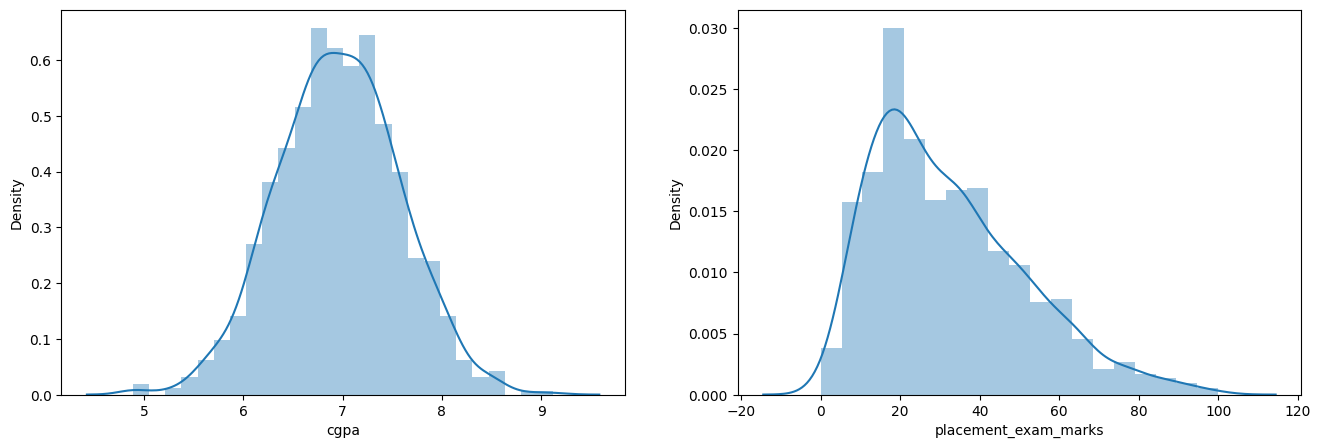

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [8]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

### 4. CGPA - Outlier Detection Using Standard Deviation

In [9]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [10]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [11]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
485  4.92                  44.0       1
995  8.87                  44.0       1
996  9.12                  65.0       1
997  4.89                  34.0       0
999  4.90                  10.0       1

### 5. Trimming CGPA Outliers

In [12]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

cgpa  placement_exam_marks  placed
0    7.19                  26.0       1
1    7.46                  38.0       1
2    7.54                  40.0       1
3    6.42                   8.0       1
4    7.23                  17.0       0
..    ...                   ...     ...
991  7.04                  57.0       0
992  6.26                  12.0       0
993  6.73                  21.0       1
994  6.48                  63.0       0
998  8.62                  46.0       1

[995 rows x 3 columns]

### 6. CGPA Z-Score Method

In [ ]:
# Approach 2
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [14]:
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore
0  7.19                  26.0       1     0.371425
1  7.46                  38.0       1     0.809810
2  7.54                  40.0       1     0.939701
3  6.42                   8.0       1    -0.878782
4  7.23                  17.0       0     0.436371

In [15]:
df[df['cgpa_zscore'] > 3]

cgpa  placement_exam_marks  placed  cgpa_zscore
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062

In [16]:
df[df['cgpa_zscore'] < -3]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [17]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

cgpa  placement_exam_marks  placed  cgpa_zscore
485  4.92                  44.0       1    -3.314251
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
999  4.90                  10.0       1    -3.346724

In [18]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [19]:
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]

### 7. Capping CGPA Outliers

In [20]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [21]:
lower_limit

np.float64(5.113546374602832)

In [22]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [23]:
df.shape

(1000, 4)

In [24]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

### 8. Placement Exam Marks - Descriptive Stats
Similarly it can be done for another column which is placement_exam_marks

In [27]:
print("Mean value of placement_exam_marks",df['placement_exam_marks'].mean())
print("Std value of placement_exam_marks",df['placement_exam_marks'].std())
print("Min value of placement_exam_marks",df['placement_exam_marks'].min())
print("Max value of placement_exam_marks",df['placement_exam_marks'].max())

Mean value of placement_exam_marks 32.225
Std value of placement_exam_marks 19.13082233892108
Min value of placement_exam_marks 0.0
Max value of placement_exam_marks 100.0


In [28]:
# boundary values
print("Highest allowed",df['placement_exam_marks'].mean() + 3*df['placement_exam_marks'].std())
print("Lowest allowed",df['placement_exam_marks'].mean() - 3*df['placement_exam_marks'].std())

Highest allowed 89.61746701676324
Lowest allowed -25.167467016763247


In [29]:
# Finding the outliers
df[(df['placement_exam_marks'] > 89.61) | (df['placement_exam_marks'] < -25.16)]

cgpa  placement_exam_marks  placed  cgpa_zscore
9    7.75                  94.0       1     1.280667
134  6.33                  93.0       0    -1.024910
162  7.80                  90.0       0     1.361849
324  6.64                  90.0       0    -0.521580
630  6.56                  96.0       1    -0.651472
730  6.14                  90.0       1    -1.333403
846  6.99                  97.0       0     0.046696
917  5.95                 100.0       0    -1.641896

In [30]:
# Trimming

new_df = df[(df['cgpa'] < 89.61) & (df['cgpa'] > -25.16)]
new_df

cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.190000                  26.0       1     0.371425
1    7.460000                  38.0       1     0.809810
2    7.540000                  40.0       1     0.939701
3    6.420000                   8.0       1    -0.878782
4    7.230000                  17.0       0     0.436371
..        ...                   ...     ...          ...
995  8.808934                  44.0       1     3.099150
996  8.808934                  65.0       1     3.505062
997  5.113546                  34.0       0    -3.362960
998  8.620000                  46.0       1     2.693239
999  5.113546                  10.0       1    -3.346724

[1000 rows x 4 columns]

In [32]:
# calculate z score
df['marks_zscore'] = (df['placement_exam_marks'] - df['placement_exam_marks'].mean())/df['placement_exam_marks'].std()

In [33]:
df.head()

cgpa  placement_exam_marks  placed  cgpa_zscore  marks_zscore
0  7.19                  26.0       1     0.372949     -0.325391
1  7.46                  38.0       1     0.813630      0.301869
2  7.54                  40.0       1     0.944202      0.406412
3  6.42                   8.0       1    -0.883807     -1.266281
4  7.23                  17.0       0     0.438235     -0.795836

In [34]:
# Trimming based on Z-score
new_df_marks = df[(df['marks_zscore'] < 3) & (df['marks_zscore'] > -3)]
display(new_df_marks.head())
display(new_df_marks.shape)

cgpa  placement_exam_marks  placed  cgpa_zscore  marks_zscore
0  7.19                  26.0       1     0.372949     -0.325391
1  7.46                  38.0       1     0.813630      0.301869
2  7.54                  40.0       1     0.944202      0.406412
3  6.42                   8.0       1    -0.883807     -1.266281
4  7.23                  17.0       0     0.438235     -0.795836

(992, 5)

In [35]:
# capping
upper_limit_marks = df['placement_exam_marks'].mean() + 3*df['placement_exam_marks'].std()
lower_limit_marks = df['placement_exam_marks'].mean() - 3*df['placement_exam_marks'].std()

df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] > upper_limit_marks,
    upper_limit_marks,
    np.where(
        df['placement_exam_marks'] < lower_limit_marks,
        lower_limit_marks,
        df['placement_exam_marks']
    )
)

In [36]:
display(df.head())
display(df['placement_exam_marks'].describe())

cgpa  placement_exam_marks  placed  cgpa_zscore  marks_zscore
0  7.19                  26.0       1     0.372949     -0.325391
1  7.46                  38.0       1     0.813630      0.301869
2  7.54                  40.0       1     0.944202      0.406412
3  6.42                   8.0       1    -0.883807     -1.266281
4  7.23                  17.0       0     0.438235     -0.795836

count    1000.000000
mean       32.191940
std        19.025096
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        89.617467
Name: placement_exam_marks, dtype: float64

# USING IQR

### Boxplot for CGPA & Placement Exam Marks

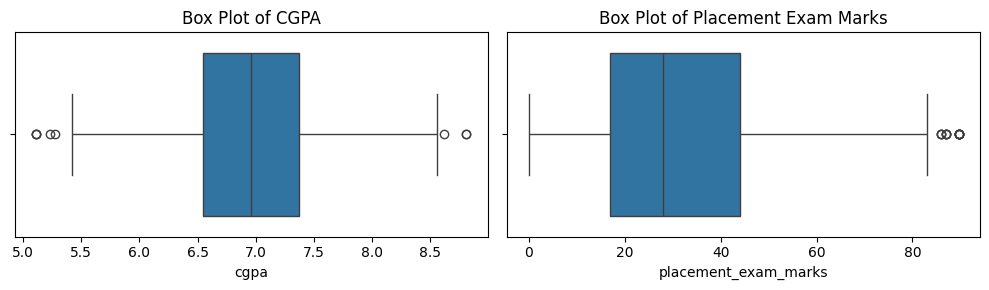

In [45]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['cgpa'])
plt.title('Box Plot of CGPA')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])
plt.title('Box Plot of Placement Exam Marks')

plt.tight_layout()
plt.show()

In [47]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)
iqr = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", iqr)

Q1: 17.0
Q3: 44.0
IQR: 27.0


In [48]:
Q12 = df['cgpa'].quantile(0.25)
Q32 = df['cgpa'].quantile(0.75)
iqr2 = Q32 - Q12

print("Q1:", Q12)
print("Q3:", Q32)
print("IQR:", iqr2)

Q1: 6.55
Q3: 7.37
IQR: 27.0


In [65]:
upper_limit_iqr = Q3 + 1.5 * iqr
lower_limit_iqr = Q1 - 1.5 * iqr
print("Upper Limit (IQR) of placement marks :", upper_limit_iqr)
print("Lower Limit (IQR) of placement marks :", lower_limit_iqr)

Upper Limit (IQR) of placement marks : 84.5
Lower Limit (IQR) of placement marks : -23.5


In [66]:
upper_limit_marks_iqr = Q3 + 1.5 * iqr
lower_limit_marks_iqr = Q1 - 1.5 * iqr

new_df_marks_trimmed_iqr = df[(df['placement_exam_marks'] < upper_limit_marks_iqr) & (df['placement_exam_marks'] > lower_limit_marks_iqr)].copy()
print("Shape after trimming placement_exam_marks (IQR):", new_df_marks_trimmed_iqr.shape)
display(new_df_marks_trimmed_iqr.head())

Shape after trimming placement_exam_marks (IQR): (985, 5)


cgpa  placement_exam_marks  placed  cgpa_zscore  marks_zscore
0  7.19                  26.0       1     0.372949     -0.325391
1  7.46                  38.0       1     0.813630      0.301869
2  7.54                  40.0       1     0.944202      0.406412
3  6.42                   8.0       1    -0.883807     -1.266281
4  7.23                  17.0       0     0.438235     -0.795836

In [67]:
df_marks_capped_iqr = df.copy()

df_marks_capped_iqr['placement_exam_marks'] = np.where(
    df_marks_capped_iqr['placement_exam_marks'] > upper_limit_marks_iqr,
    upper_limit_marks_iqr,
    np.where(
        df_marks_capped_iqr['placement_exam_marks'] < lower_limit_marks_iqr,
        lower_limit_marks_iqr,
        df_marks_capped_iqr['placement_exam_marks']
    )
)
print("Shape after capping:", df_marks_capped_iqr.shape)
display(df_marks_capped_iqr.head())
display(df_marks_capped_iqr['placement_exam_marks'].describe())

Shape after capping: (1000, 5)


cgpa  placement_exam_marks  placed  cgpa_zscore  marks_zscore
0  7.19                  26.0       1     0.372949     -0.325391
1  7.46                  38.0       1     0.813630      0.301869
2  7.54                  40.0       1     0.944202      0.406412
3  6.42                   8.0       1    -0.883807     -1.266281
4  7.23                  17.0       0     0.438235     -0.795836

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64